# Challenge Description

- Predict conversion rate
- Come up with recommendations for the product team and the marketing team to improve conversion rate

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

In [3]:
filename = "Data/01_conversion_rate/conversion_data.csv"
data = pd.read_csv(filename)
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
print(f"nrow = {data.shape[0]}, ncol = {data.shape[1]}")

nrow = 316200, ncol = 6


In [5]:
# check null data

print(f'Is there any null values?  {data.isnull().values.any()}')

Is there any null values?  False


In [6]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
print("Unique Values \n")
for col in data.columns:
    unique_list = sorted(list(data[col].unique()))
    print(f"{col} = {unique_list}")

Unique Values 

country = ['China', 'Germany', 'UK', 'US']
age = [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123]
new_user = [0, 1]
source = ['Ads', 'Direct', 'Seo']
total_pages_visited = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
converted = [0, 1]


## Remove Outliers

Theoretically, people's age should not be larger than 100, so they are perceived as outliers and are removed.

In [8]:
data[data['age'] > 100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [9]:
# remove data with ages above 100
data = data[data['age'] <= 100]

# EDA

Text(0.5, 1.0, 'The number of converted users v.s. non-converted users')

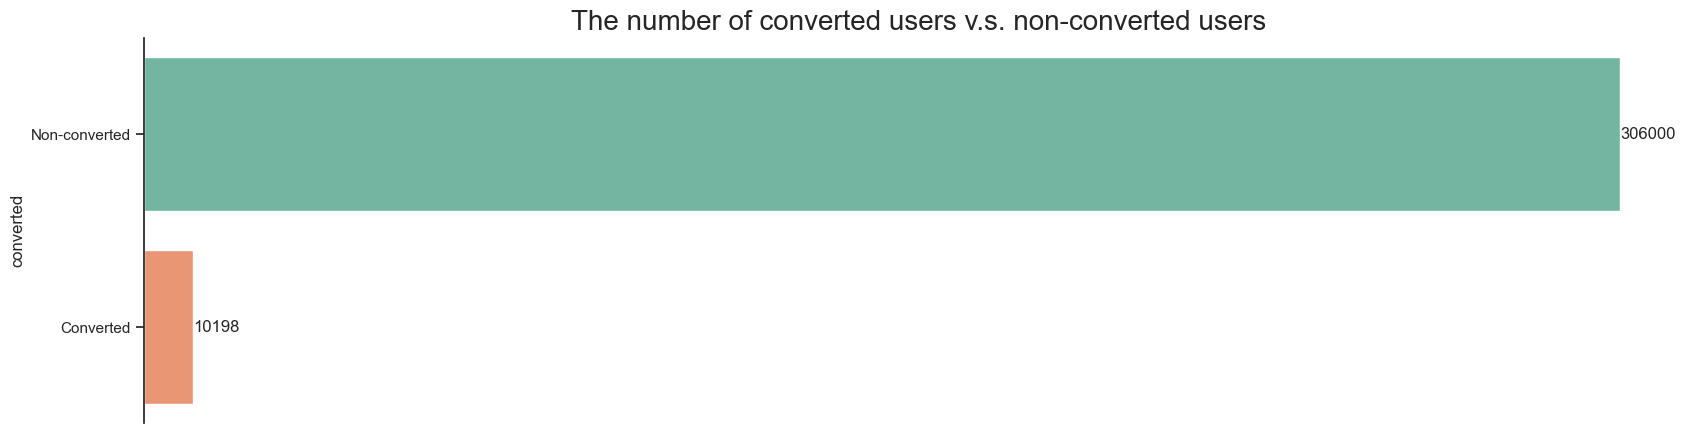

In [10]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.bottom": False, 'xtick.bottom': False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)

plt.figure(figsize=(20,5))
ax = sns.countplot(y=data["converted"])
ax.bar_label(ax.containers[0])
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set_yticklabels(['Non-converted', 'Converted'])
# labels[0]
plt.title("The number of converted users v.s. non-converted users", fontsize=20)

In [22]:
def plot_conversion_rate_categorical(df, target):
    
    custom_params = {"axes.spines.top": False, "font.size": 16}
    sns.set_theme(style="ticks", palette="Set2", font_scale=2, rc=custom_params)

    # calculate the conversion rate and the number of users for each target of interest
    total = df.groupby(target)["converted"].count().reset_index()
    group = df[[target, "converted"]].groupby(target).mean().reset_index()
    order_list = group[target]

    fig, g1 = plt.subplots(figsize=(20, 6))
    g2 = g1.twinx()

    # barplot
    sns.countplot(df, x=target, hue="converted", order=order_list, ax=g1)
    g1.set_yscale("log")

    # lineplot: to show conversion rate
    g2.plot(group[target], group["converted"], color="dimgrey", marker='o', linestyle='dashed',
         linewidth=2, markersize=8)

    # annotation
    for i in range(group.shape[0]):

        x = group.iloc[i][target]
        y = group.iloc[i]["converted"]
        label = f"{y*100:.2f}%"

        plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', color="dimgrey")
        
    # add the number of users for each target of interest to x labels
    labels = [item.get_text() for item in g1.get_xticklabels()]
    if target == "new_user":
        labels = [int(label) for label in labels]
        
    labels = [f"{label} \n {total[total[target] == label]['converted'].values[0]:,}" for label in labels]
    g1.set_xticklabels(labels)
    
    fig.text(0.06, 0, 'Note: Numbers under labels are the total number for each label', ha='left', fontsize=20)
    
    plt.title(f"Conversion rate by {target}", fontsize=25, pad=40)
    plt.tight_layout()
    plt.show()
    
    
def plot_conversion_rate_continuous(df, target):
    
    custom_params = {"axes.spines.top": False, "axes.spines.right": False, "font.size": 16}
    sns.set_theme(style="ticks", palette="Set2", font_scale=2, rc=custom_params)

    group = df[[target, "converted"]].groupby(target).mean().reset_index()

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(group[target], group["converted"], linewidth=2)

    ax.set_xlabel(target)
    ax.set_ylabel("Convertion rate")
    
    plt.title(f"Conversion rate by {target}", fontsize=25, pad=40)
    plt.show()

## Conversion Rate by Country, Source, and User Type

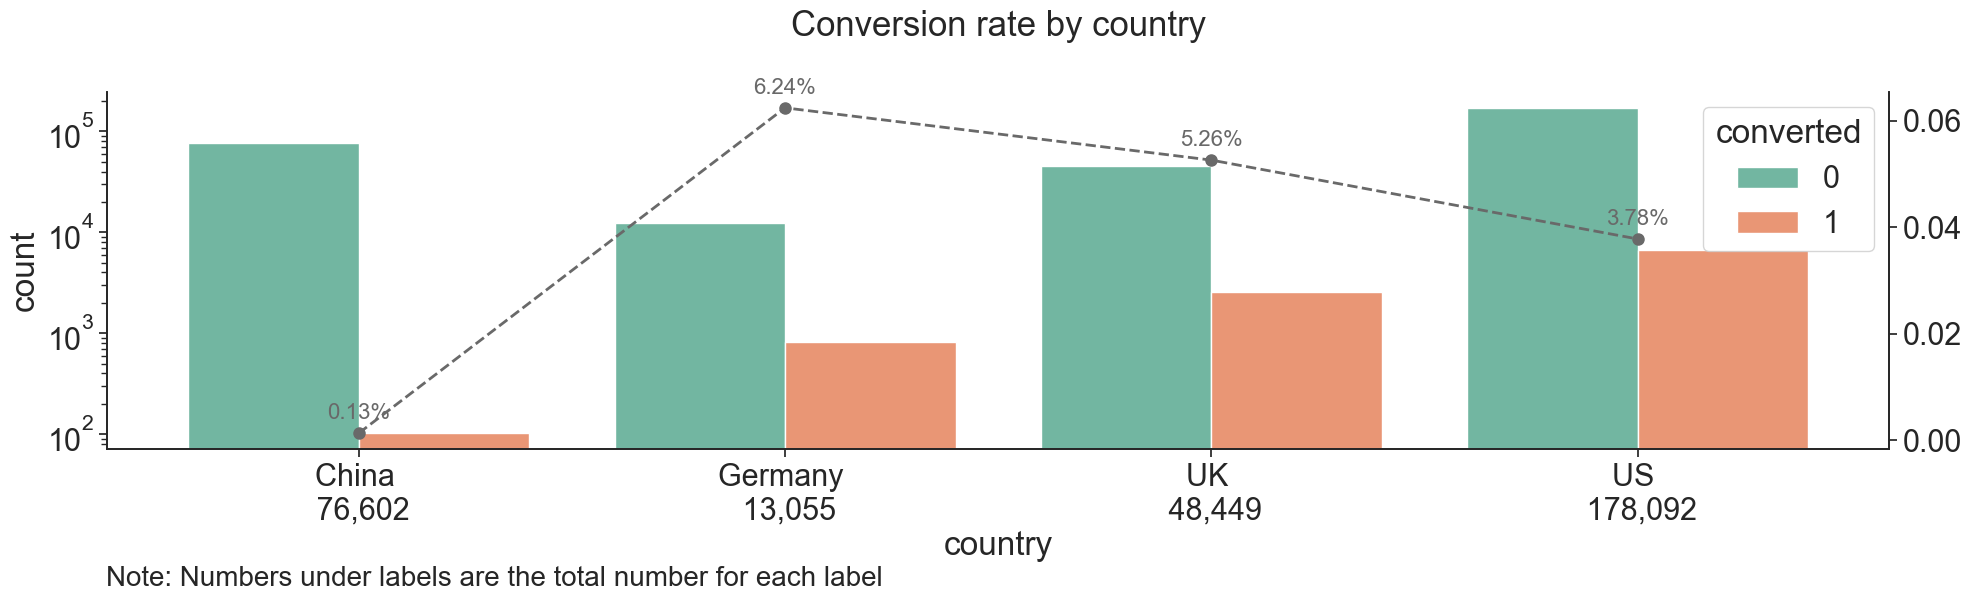

In [12]:
plot_conversion_rate_categorical(data, "country")

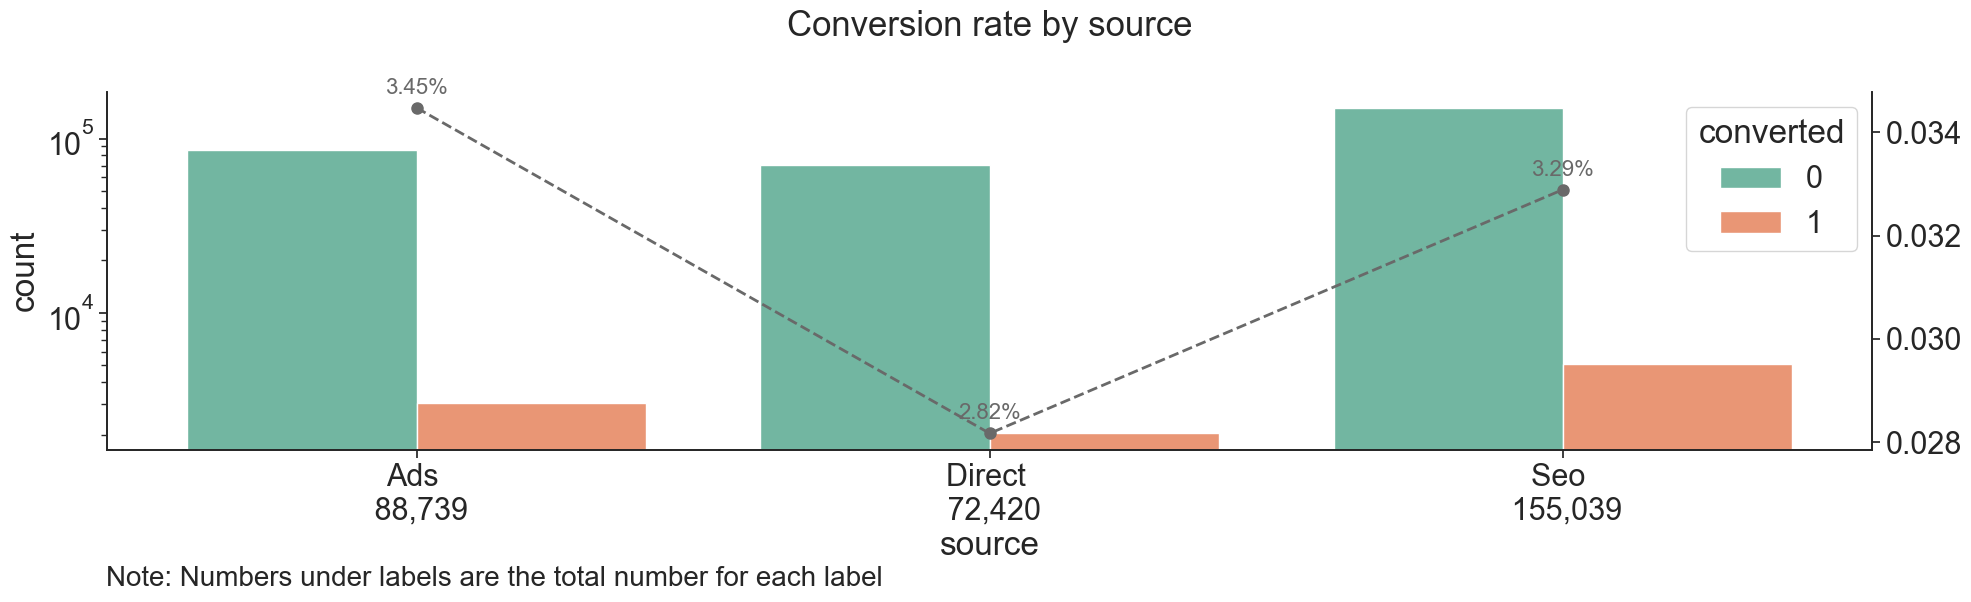

In [13]:
plot_conversion_rate_categorical(data, "source")

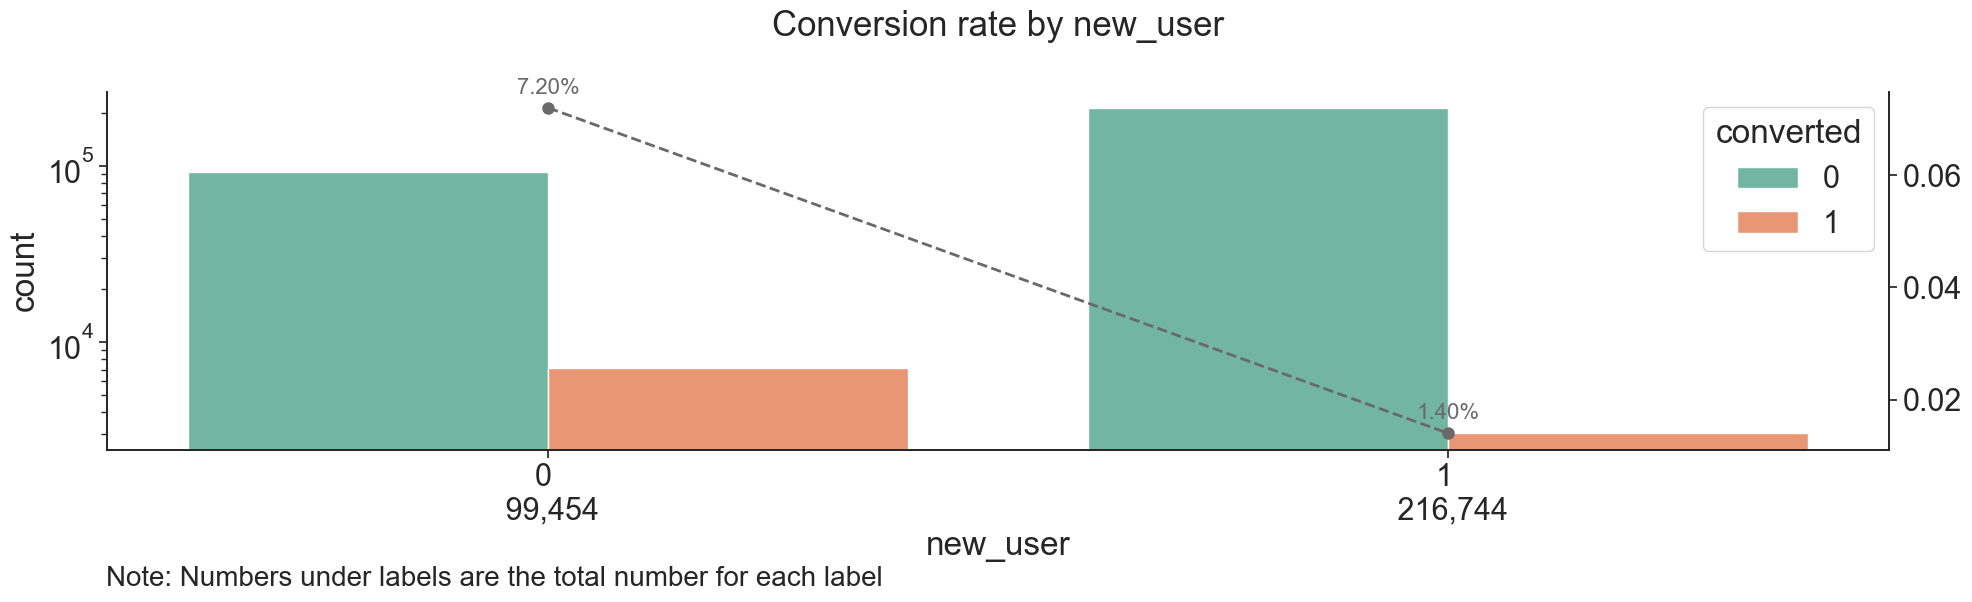

In [23]:
plot_conversion_rate_categorical(data, "new_user")

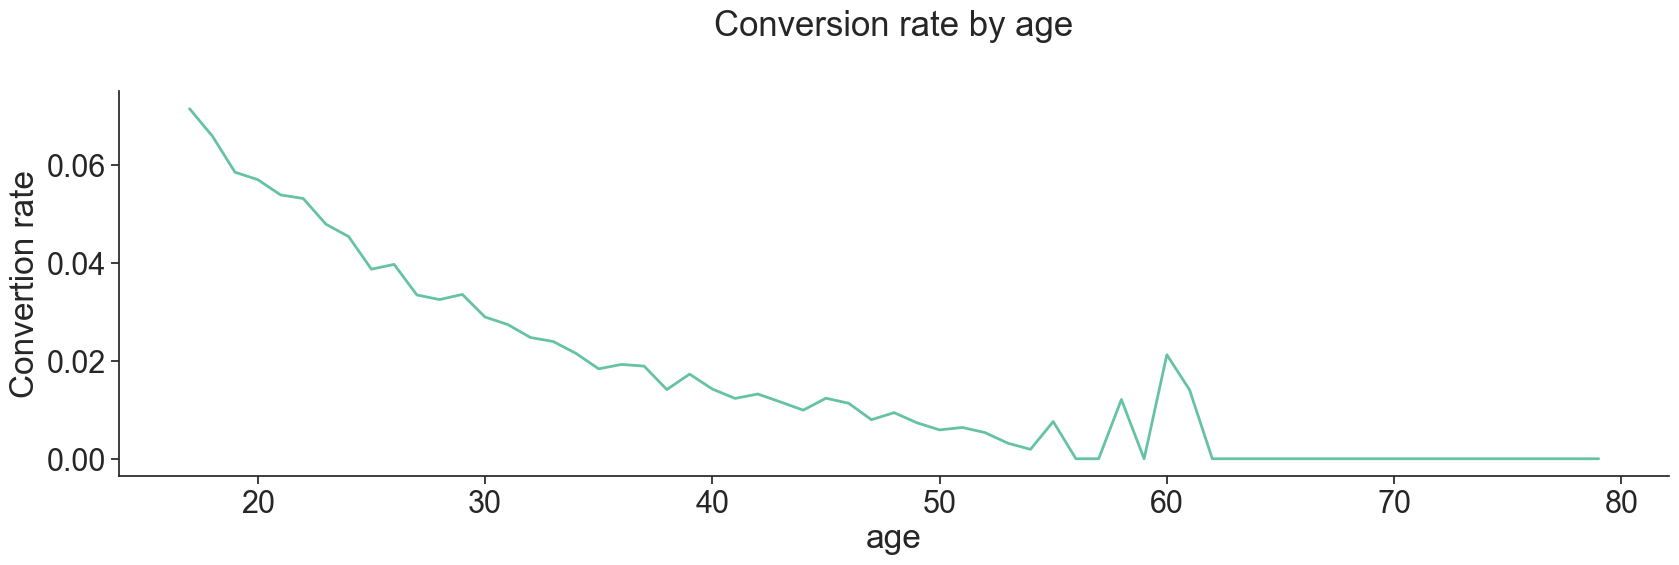

In [24]:
plot_conversion_rate_continuous(data, "age")

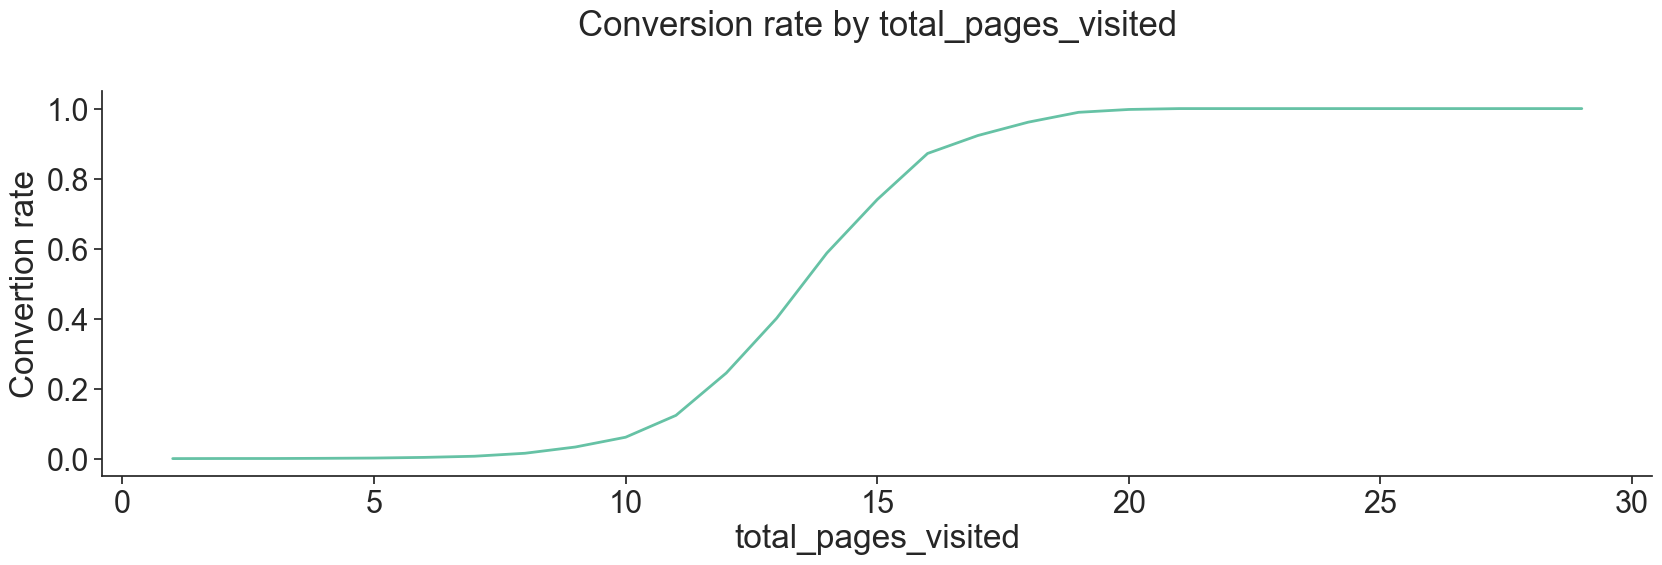

In [25]:
plot_conversion_rate_continuous(data, "total_pages_visited")

- For converted users, old users are twice likely to buy products than new users.

- For non-converted users, new users are twice more than old users.

# Model

In [26]:
import statsmodels.api as sm
from sklearn import preprocessing

## Categorical Features

In [43]:
cat_features = ["new_user", "country", "source"]
cat_df = data[cat_features]

cat_df = cat_df.astype("category")
cat_df = cat_df.reset_index(drop=True)
# cat_df = cat_df.astype("category")

cat_df.describe()

,new_user,country,source
count,316198,316198,316198
unique,2,4,3
top,1,US,Seo
freq,216744,178092,155039


## Numerical Features

In [28]:
num_features = ["age", "total_pages_visited"]

con_df = data[num_features]

# normalization
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(con_df)
scaled_df = pd.DataFrame(d, columns=num_features)

scaled_df.head()

,age,total_pages_visited
0,0.129032,0.000000
1,0.096774,0.142857
2,0.177419,0.107143
3,0.354839,0.142857
4,0.209677,0.178571


### Logistic Regression for each feature

Use non-normalized data to Interpret the values

In [30]:
import statsmodels.formula.api as smf

def logistic_regression(df, target):
    
    y = data["converted"]
    
    model = sm.GLM(y, sm.add_constant(df[target]), family=sm.families.Binomial())
    results = model.fit()
    return results.summary()

def logistic_regression_api(df, formula):

    model = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
    results = model.fit()
    return results.summary()

### age

$\rm{converted} = -1.3566 - 0.0718 \times \rm{age}$

- $OR = e^{- 0.0718} = 0.9307$ → If users become one year older, their probability of converting declines by 7%.

In [32]:
# age only

logistic_regression(data, "age")

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:               316198
Model:                            GLM   Df Residuals:                   316196
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43662.
Date:                Mon, 21 Nov 2022   Deviance:                       87324.
Time:                        21:59:35   Pearson chi2:                 3.16e+05
No. Iterations:                     7   Pseudo R-squ. (CS):           0.008762
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3566      0.040    -33.912      0.000      -1.435      -1.278
age           -0.0718      0.001    -49.403      0.000      -0.075      -0.069
==============================================================================
"""

In [33]:
# total_pages_visited only

logistic_regression(data, "total_pages_visited")

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:               316198
Model:                            GLM   Df Residuals:                   316196
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15998.
Date:                Mon, 21 Nov 2022   Deviance:                       31997.
Time:                        21:59:39   Pearson chi2:                 2.85e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1679
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -10.2441      0.065   -157.887      0.000     -10.371     -10.117
total_pages_visited     0.7564      0.006    136.135      0.000       0.746       0.767
=======================================================================================
"""

In [34]:
logistic_regression_api(data, "converted ~ age + total_pages_visited + C(new_user) + C(country) + C(source)")

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:               316198
Model:                            GLM   Df Residuals:                   316189
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12841.
Date:                Mon, 21 Nov 2022   Deviance:                       25682.
Time:                        21:59:43   Pearson chi2:                 2.53e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1843
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -10.3410      0.150    -68.762      0.000     -10.636     -10.046
C(new_user)[T.1]         -1.7390      0.036    -48.876      0.000      -1.809      -1.669
C(country)[T.Germany]     3.8158      0.132     28.883      0.000       3.557       4.075
C(country)[T.UK]          3.6100      0.120     30.024      0.000       3.374       3.846
C(country)[T.US]          3.2469      0.117     27.847      0.000       3.018       3.475
C(source)[T.Direct]      -0.1859      0.049     -3.817      0.000      -0.281      -0.090
C(source)[T.Seo]         -0.0238      0.040     -0.598      0.550      -0.102       0.054
age                      -0.0741      0.002    -31.191      0.000      -0.079      -0.069
total_pages_visited       0.7584      0.006    122.092      0.000       0.746       0.771
=========================================================================================
"""

# Prediction

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [44]:
cat_df = pd.get_dummies(cat_df, drop_first=True)
data_scaled = pd.concat([cat_df, scaled_df], axis=1)

In [45]:
data_scaled.head()

,new_user_1,country_Germany,country_UK,country_US,source_Direct,source_Seo,age,total_pages_visited
0,1,0,1,0,0,0,0.129032,0.000000
1,1,0,0,1,0,1,0.096774,0.142857
2,1,0,0,1,0,1,0.177419,0.107143
3,1,0,0,0,0,1,0.354839,0.142857
4,1,0,0,1,0,1,0.209677,0.178571


In [46]:
X = data_scaled
y = data["converted"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print(score)

0.9865591397849462


In [49]:
confusion_matrix(y_test, y_pred)

array([[60991,   214],
       [  636,  1399]])

In [50]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

wrong_indices = [i for i in range(len(y_test)) if y_test.iloc[i] != y_pred[i]]

print(len(wrong_indices))

850


In [51]:
wrong_X = X_test.iloc[wrong_indices]
wrong_X.head()

,new_user_1,country_Germany,country_UK,country_US,source_Direct,source_Seo,age,total_pages_visited
73,1,0,1,0,0,1,0.193548,0.500000
126,0,0,0,1,1,0,0.016129,0.392857
131,1,0,1,0,0,0,0.064516,0.321429
156,0,0,1,0,1,0,0.048387,0.321429
206,0,0,1,0,0,1,0.112903,0.321429


In [52]:
wrong_X[wrong_X.new_user_1 == 1]["new_user_1"].count()

345

In [53]:
wrong_X[wrong_X.country_Germany == 1]["country_Germany"].count()

45

In [54]:
wrong_X[wrong_X.country_UK == 1]["country_UK"].count()

180

In [55]:
wrong_X[wrong_X.source_Direct == 1]["source_Direct"].count()

184

In [56]:
wrong_X[wrong_X.source_Seo == 1]["source_Seo"].count()

416

# Reference

1. https://realpython.com/logistic-regression-python/